<a href="https://colab.research.google.com/github/easyhardhoon/data_analysis_with_stats/blob/main/DA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 시각화(2)

**1. Series**

In [ ]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
preg = pd.read_csv("./2002FemPreg.tsv", sep="\t")
live  = preg[preg.outcome == 1]

series는 다양한 요약 통계 방법들을 제공한다

In [ ]:
mean = live.prglngth.mean()
median = live.prglngth.median()
var = live.prglngth.var()
std = live.prglngth.std()
print(f"mean : {mean} , std : {std} ")

mean : 38.56055968517709 , std : 2.702343810070593 


In [ ]:
firsts = live[live.birthord==1]
others = live[live.birthord!=1]
firsts.prglngth.mean(),others.prglngth.mean() #tuple type

(38.60095173351461, 38.52291446673706)

In [ ]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

✔Cohen effect size
    
    두 집단의 평균 차이를 표준편차로 비교하는 방법.

In [6]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
  
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    #np.sqrt(pooled_var)은 합동표준편차에 해당합니다
    d = diff / np.sqrt(pooled_var)
    return d

In [ ]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

cohen의 값이 크지 않다. 두 집단에는 유의미한 차이가 없을 가능성이 높다는 뜻이다

In [ ]:
firsts.prglngth.mode() #최빈값

0    39
dtype: int64

In [ ]:
firsts.prglngth.value_counts()[firsts.prglngth.mode()] #의 count

39    2114
Name: prglngth, dtype: int64

---

In [ ]:
firsts.prglngth.value_counts().head() #실험

39    2114
40     536
41     360
38     272
37     208
Name: prglngth, dtype: int64

In [ ]:
firsts.prglngth.value_counts()[38] #이렇게 []안에 특정 값을 넣으면 그의 count 구해줌

272

---

In [ ]:
others.prglngth.value_counts()[others.prglngth.mode()]

39    2579
Name: prglngth, dtype: int64

In [ ]:
print(f"others : {others.prglngth.mean()}, firsts : {firsts.prglngth.mean()}")

others : 38.52291446673706, firsts : 38.60095173351461


이렇듯 firsts와 others의 평균 차이도 크지 않고 최빈값과 최빈값의 빈도또한 비슷함을 알 수 있다.

더더욱 두 집단에는 유의미한 차이가 없을 가능성이 높다는 뜻이다

이제 이 두 집단의 데이터를 pie chart로 시각화해본다

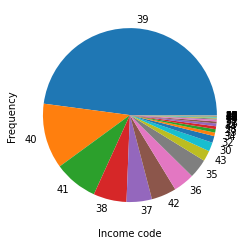

In [ ]:
#firsts
plt.rcParams['figure.facecolor'] = 'white'
firsts["prglngth"].value_counts().plot.pie()
plt.xlabel("Income code")
plt.ylabel("Frequency")
plt.show()
plt.close()

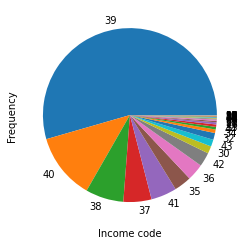

In [ ]:
#others
plt.rcParams['figure.facecolor'] = 'white'
others["prglngth"].value_counts().plot.pie()
plt.xlabel("Income code")
plt.ylabel("Frequency")
plt.show()
plt.close()

시각화를 하면 보다 쉽게 두 집단에 유의미한 차이가 없다는 것을 알 수 있다.

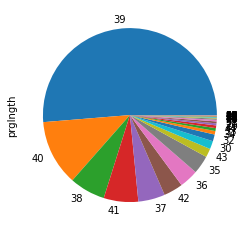

In [ ]:
#all
plt.rcParams['figure.facecolor'] = 'white'
live["prglngth"].value_counts().plot.pie()
plt.show()
plt.close()

▶추가 : firsts와 others의 비율은 어떻게 될까?

In [ ]:
firsts_percent = live.birthord.value_counts()[1] / live.prglngth.value_counts().sum()
others_percent = 1- firsts_percent
print(f"first : {firsts_percent} , others : {others_percent} ")
#그래도 외동의 비율이 더 적은 모습.

first : 0.4824005247048535 , others : 0.5175994752951465 


그래서 all pie_chart의 비율이 위와 같이 나오는 것을 확인할 수 있다.

**2. Exercises**

*totalwgt_lb*를 통해 첫 아이와 다른 아이들의 무게 차이에 대해 분석

In [2]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
preg = pd.read_csv("./2002FemPreg.tsv", sep="\t")
live  = preg[preg.outcome == 1]
firsts = live[live.birthord==1]
others = live[live.birthord!=1]

In [3]:
firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()

-0.12476118453549034

In [7]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

새로운 데이터 셋 불러오기

In [8]:
resp = pd.read_csv("./2002FemResp.tsv", sep="\t")

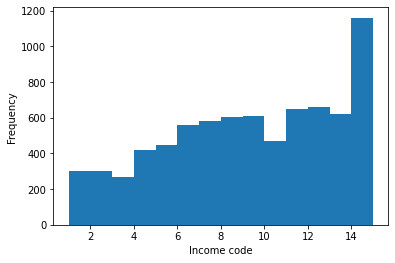

In [9]:
#totincr는 답변자 가구의 총 소득을 나타낸다.
resp["totincr"].plot.hist(bins=range(int(resp["totincr"].min()), int(resp["totincr"].max()+2)))
plt.xlabel("Income code")
plt.ylabel("Frequency")
plt.show()
plt.close()

✈parity 분석

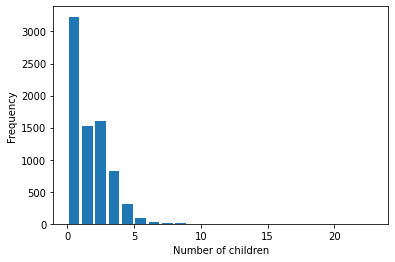

In [10]:
#parity는 답변자의 아이 수를 나타낸다.
resp["parity"].plot.hist(bins = range(int(resp["parity"].min()), int(resp["parity"].max()+2)), rwidth=0.8)
plt.xlabel("Number of children")
plt.ylabel("Frequency")
plt.show()
plt.close()

In [11]:
#outlier 찾아보기
resp.groupby("parity").count()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,marstat,fmarstat,fmarit,evrmarry,hisp,hispgrp,numrace,roscnt,hplocale,manrel,fl_rage,fl_rrace,fl_rhisp,goschol,vaca,higrade,compgrd,havedip,dipged,cmhsgrad,havedeg,degrees,wthparnw,onown,intact,parmarr,lvsit14f,lvsit14m,womrasdu,momdegre,...,fibroids,pidtreat,evhivtst,anyprghp_i,anymschp_i,infever_i,ovulate_i,tubes_i,infertr_i,inferth_i,advice_i,insem_i,invitro_i,endomet_i,fibroids_i,pidtreat_i,evhivtst_i,insuranc,metro,religion,laborfor,insuranc_i,metro_i,religion_i,laborfor_i,poverty,totincr,pubassis,poverty_i,totincr_i,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
parity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3230,3230,3230,3230,3230,3229,3230,3230,3230,3230,3230,288,3230,3230,3230,509,3230,3230,887,874,3230,3230,3230,3230,1530,3230,3223,2542,2377,2258,1931,984,3230,3212,2964,3230,1170,1170,1170,3216,...,187,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230
1,1519,1519,1519,1519,1519,1517,1519,1519,1519,1519,1519,178,1519,1519,1519,314,1519,1519,930,909,1519,1519,1519,1519,218,1519,1517,1488,1289,1164,864,439,1519,1513,1510,1519,575,575,575,1514,...,154,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519,1519
2,1603,1603,1603,1603,1603,1601,1603,1603,1603,1603,1603,118,1603,1603,1603,385,1603,1603,1134,1122,1603,1603,1603,1603,152,1603,1602,1586,1333,1174,880,468,1603,1601,1603,1603,603,603,603,1589,...,141,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603,1603
3,828,828,828,828,828,827,828,828,828,828,828,85,828,828,828,230,828,828,589,566,828,828,828,828,67,828,825,818,616,515,390,193,828,828,828,828,301,301,301,821,...,56,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828,828
4,309,309,309,309,309,308,309,309,309,309,309,38,309,309,309,101,309,309,183,183,309,309,309,309,22,309,308,305,219,172,115,48,309,309,309,309,130,130,130,301,...,25,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309
5,95,95,95,95,95,95,95,95,95,95,95,15,95,95,95,32,95,95,55,50,95,95,95,95,4,95,93,92,53,42,24,10,95,95,95,95,38,38,38,93,...,6,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
6,29,29,29,29,29,29,29,29,29,29,29,1,29,29,29,10,29,29,15,12,29,29,29,29,3,29,29,27,12,8,5,2,29,29,29,29,13,13,13,28,...,0,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
7,15,15,15,15,15,15,15,15,15,15,15,3,15,15,15,5,15,15,10,10,15,15,15,15,0,15,14,14,6,4,2,2,15,15,15,15,4,4,4,15,...,0,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
8,8,8,8,8,8,8,8,8,8,8,8,4,8,8,8,0,8,8,5,2,8,8,8,8,2,8,8,8,6,6,1,1,8,8,8,8,5,5,5,8,...,0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [12]:
resp.groupby("parity").count()["caseid"]

parity
0     3230
1     1519
2     1603
3      828
4      309
5       95
6       29
7       15
8        8
9        2
10       3
16       1
22       1
Name: caseid, dtype: int64

In [13]:
#최종 outlier
resp.groupby("parity").count()["caseid"].sort_index(ascending=False)[0:5]
#자식 수가 22...?? 데이터 오류의 일종인듯. 

parity
22    1
16    1
10    3
9     2
8     8
Name: caseid, dtype: int64

✈가설검증 : 소득이 높은 사람이 더 아이를 많이 나을까?


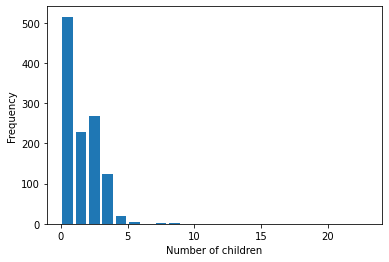

In [14]:
#totincr level이 14 이상인 집단의 parity분석
resp[resp.totincr >= 14]["parity"].plot.hist(rwidth=0.8, bins = range(int(resp["parity"].min()), int(resp["parity"].max()+2)))
plt.xlabel("Number of children")
plt.ylabel("Frequency")
plt.show()
plt.close()

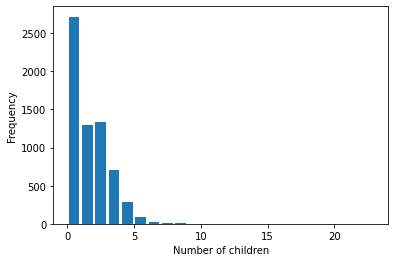

In [17]:
#totincr level이 14 이하인 집단의 parity분석
resp[resp.totincr < 14]["parity"].plot.hist(rwidth=0.8, bins = range(int(resp["parity"].min()), int(resp["parity"].max()+2)))
plt.xlabel("Number of children")
plt.ylabel("Frequency")
plt.show()
plt.close()

고소득 답변자 중 가장 아이를 많이 낳은 경우 확인



In [15]:
#1차로 totincr로 고소득 답변자의 데이터로 가공한다.
#parity값을 기준으로 그룹화&카운트를 하고 caseid 인덱스 값들을 역순으로 정렬하여 최초값 5개를 빼낸다
resp[resp["totincr"] >= 14].groupby("parity").count()["caseid"].sort_index(ascending=False)[:5]

parity
8      1
7      1
5      5
4     19
3    123
Name: caseid, dtype: int64

저소득 답변자 중 가장 아이를 많이 낳은 경우 확인

In [16]:
resp[resp["totincr"] < 14].groupby("parity").count()["caseid"].sort_index(ascending=False)[:5]

parity
22    1
16    1
10    3
9     2
8     7
Name: caseid, dtype: int64

두 집단의 parity 평균 비교

In [18]:
higher = resp[resp["totincr"] >= 14]
other  = resp[resp["totincr"] < 14]
higher.parity.mean(), other.parity.mean()

(1.0758620689655172, 1.2495758136665125)

In [19]:
CohenEffectSize(higher.parity, other.parity)

-0.1251185531466061

✔ 즉, 고소득층이 아이를 더 많이 낳는다고 볼 수 없으며 오히려 저소득층이 조금 더 아이를 더 많이 낳는 경향이 있다.